In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import keras
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [193]:
#Reading and loading train and test data into datasets
dataset=pd.read_csv("CE802_P3_Data/CE802_P3_Data.csv")
test_dataset=pd.read_csv("CE802_P3_Data/CE802_P3_Test.csv")

In [194]:
#Analysing training and test datasets
test_dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,Rest,-1241.58,-132.64,-1706.31,35524.89,5.17,96.82,-3.08,12,Low,0.32,10.92,-0.83,15.60,193.70,3,NaN
1,Europe,-132.09,-113.12,-850.02,39549.27,4.27,30.16,-6.88,15,Very high,1.54,6.72,-10.07,22.41,238.70,3,NaN
2,USA,95.10,-101.95,-1719.48,-2724.33,4.69,125.88,-3.10,12,High,0.00,16.56,-7.42,23.25,149.26,2,NaN
3,USA,2067.24,-118.41,-3986.37,32421.45,5.21,79.06,-11.68,12,High,8.32,17.92,1.38,27.42,310.32,3,NaN
4,Rest,-2080.44,-47.43,-1509.36,24896.07,6.37,69.80,-10.97,9,High,0.38,15.92,-6.15,23.22,241.56,2,NaN


In [195]:
# Column info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   object 
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   int64  
 9   F10     1500 non-null   object 
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   int64  
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [196]:
#Analysing all columns in training dataset
dataset.describe()

,F2,F3,F4,F5,F6,F7,F8,F9,F11,F12,F13,F14,F15,F16,Target
count,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-630.78434,-92.061967,-2311.234440,24115.645020,4.041660,60.448080,-6.962873,11.828000,127.205547,8.109187,-3.634847,29.630000,176.946267,3.947333,922.082533
std,904.26205,29.857614,889.404292,13329.106617,2.893909,58.613624,3.024250,5.430108,1548.308592,5.812853,3.040026,12.549426,84.482786,1.836702,1092.331874
min,-3708.93000,-210.780000,-5503.920000,-35169.510000,0.040000,-144.460000,-16.390000,0.000000,0.000000,0.080000,-13.700000,-53.220000,-204.060000,0.000000,0.000000
25%,-1233.33000,-112.110000,-2926.252500,17982.390000,1.945000,21.720000,-9.080000,9.000000,0.260000,3.815000,-5.590000,23.955000,134.800000,3.000000,0.000000
50%,-641.53500,-92.015000,-2302.755000,24118.815000,3.415000,62.060000,-6.960000,12.000000,2.020000,6.740000,-3.530000,29.685000,177.070000,4.000000,429.570000
75%,-3.56250,-71.195000,-1703.347500,30824.220000,5.492500,99.740000,-4.840000,15.000000,13.610000,10.945000,-1.655000,35.565000,216.945000,5.000000,1530.205000
max,2521.86000,13.160000,671.100000,85176.180000,23.390000,239.820000,2.060000,30.000000,54949.060000,45.140000,6.070000,78.390000,738.880000,11.000000,3960.010000


In [197]:
#Analysing all columns in training dataset
test_dataset.describe()

,F2,F3,F4,F5,F6,F7,F8,F9,F11,F12,F13,F14,F15,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,0.0
mean,-640.069920,-92.438820,-2309.799040,23740.120620,4.012280,60.730400,-6.875067,12.096000,185.262587,7.893467,-3.747887,29.587400,182.214907,3.988667,NaN
std,912.540536,29.854591,905.304955,12220.887106,2.838905,61.036702,3.019654,5.392047,2242.363338,5.597540,3.089368,13.568069,89.103246,1.826498,NaN
min,-3589.950000,-188.680000,-5514.510000,-34489.050000,0.040000,-159.480000,-15.760000,0.000000,0.000000,0.180000,-13.520000,-46.860000,-236.720000,0.000000,NaN
25%,-1240.635000,-111.792500,-2889.030000,17711.370000,1.920000,22.020000,-8.912500,9.000000,0.240000,3.760000,-5.810000,23.250000,135.000000,3.000000,NaN
50%,-632.880000,-93.425000,-2292.495000,23975.010000,3.370000,62.720000,-6.860000,12.000000,1.800000,6.640000,-3.670000,29.460000,180.490000,4.000000,NaN
75%,-23.467500,-71.817500,-1703.377500,29824.935000,5.492500,101.655000,-4.847500,15.000000,14.575000,10.685000,-1.607500,35.917500,225.005000,5.000000,NaN
max,2933.670000,-4.040000,578.460000,99936.180000,18.000000,260.340000,2.740000,30.000000,72463.920000,35.220000,7.330000,98.100000,561.580000,11.000000,NaN


<AxesSubplot:>

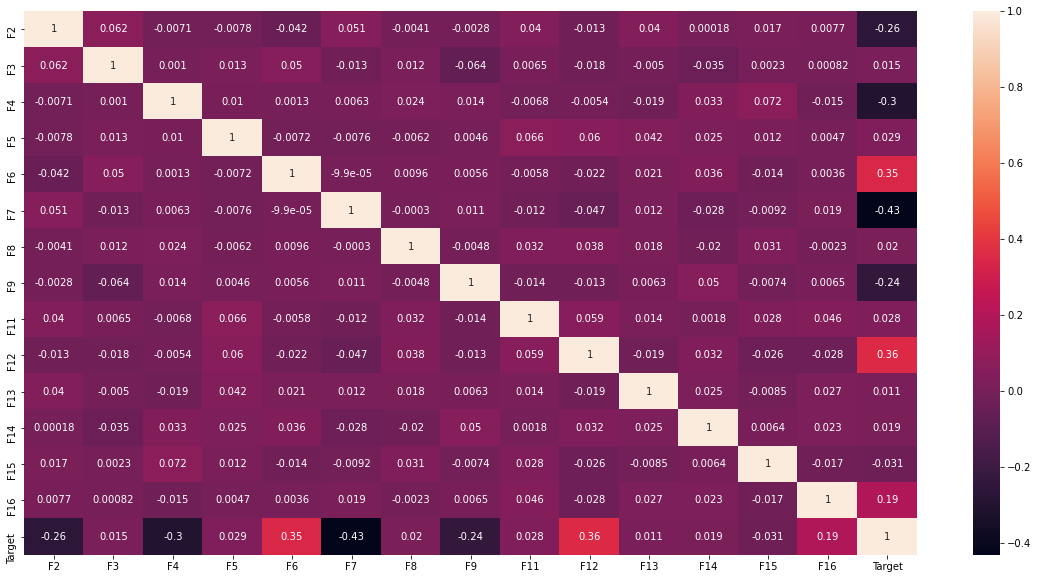

In [198]:
#Plotting Correlation
plt.figure(figsize=(20,10))
correlation=dataset.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)



In [199]:
#checking if null value is present in dataset
dataset.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

<AxesSubplot:>

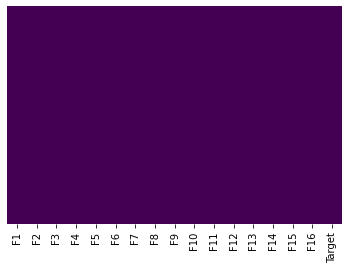

In [200]:
#heatmap for checking if null value is present in dataset
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [201]:
#Checking Unique value in each column
dataset.nunique()

F1           4
F2        1492
F3        1399
F4        1488
F5        1500
F6         737
F7        1405
F8         839
F9          11
F10          5
F11        703
F12        728
F13        833
F14        905
F15       1411
F16         12
Target    1051
dtype: int64

In [202]:
dataset.tail()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
1495,UK,-1248.72,-93.65,-2419.56,28588.14,2.08,130.12,-9.01,3,Low,18.42,9.20,-12.87,35.25,175.56,1,0.00
1496,UK,-276.99,-57.89,-1997.25,7154.19,6.49,-66.84,-5.33,9,Very low,1.54,20.24,0.82,53.55,142.92,3,2853.23
1497,UK,-747.84,-106.24,-2464.02,8831.85,8.65,5.54,-3.01,15,Low,25.62,1.06,-9.41,30.60,114.14,5,1629.55
1498,Europe,-893.10,-91.75,-2025.12,26506.41,6.31,24.38,-7.37,12,Very low,0.10,1.58,2.33,42.78,160.06,3,261.47
1499,USA,-1338.42,-113.49,-3532.80,20594.46,4.11,1.32,-6.09,0,Very low,0.02,7.20,-10.25,5.40,141.96,4,3656.19


In [203]:
# Checking object details in dataset
dataset.describe(include=np.object)

,F1,F10
count,1500,1500
unique,4,5
top,USA,Very low
freq,407,312


In [204]:
# Shape of dataset
dataset.shape

(1500, 17)

<AxesSubplot:xlabel='F11'>

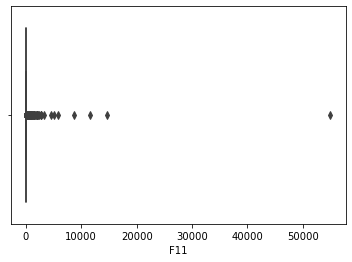

In [205]:
#boxplot to identify outlier values
sns.boxplot(x='F11',data=dataset)

<AxesSubplot:xlabel='F11'>

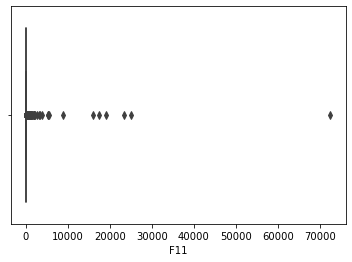

In [206]:
#boxplot to identify outlier values
sns.boxplot(x='F11',data=test_dataset)

In [207]:
# Droping duplicate rows with different values to avoid discrepancy
dataset.drop_duplicates(subset=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16'])

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,UK,258.63,-162.72,-2229.84,31489.95,2.52,192.26,-11.99,12,Very low,280.78,11.44,-4.77,52.05,171.46,6,0.00
1,Europe,1033.35,-105.16,-2786.58,24534.99,7.18,46.52,-10.66,15,Very high,0.02,7.78,-6.82,26.49,119.34,4,1073.28
2,UK,-1207.47,-112.02,-3162.63,23017.47,3.85,71.06,-4.24,24,Medium,16.32,8.14,-0.91,26.97,15.96,7,1203.67
3,USA,-1090.17,-99.53,-3784.14,25597.56,1.18,-8.54,-4.70,18,High,1.08,2.28,-8.12,35.34,176.32,1,789.66
4,Europe,-2191.02,-69.12,-2956.14,24770.94,6.22,55.22,-7.82,9,Low,134.62,13.82,-5.92,31.47,117.94,4,2093.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,UK,-1248.72,-93.65,-2419.56,28588.14,2.08,130.12,-9.01,3,Low,18.42,9.20,-12.87,35.25,175.56,1,0.00
1496,UK,-276.99,-57.89,-1997.25,7154.19,6.49,-66.84,-5.33,9,Very low,1.54,20.24,0.82,53.55,142.92,3,2853.23
1497,UK,-747.84,-106.24,-2464.02,8831.85,8.65,5.54,-3.01,15,Low,25.62,1.06,-9.41,30.60,114.14,5,1629.55
1498,Europe,-893.10,-91.75,-2025.12,26506.41,6.31,24.38,-7.37,12,Very low,0.10,1.58,2.33,42.78,160.06,3,261.47


In [208]:
from matplotlib import pyplot as plt


(array([1.495e+03, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0.   ,  5494.906, 10989.812, 16484.718, 21979.624, 27474.53 ,
        32969.436, 38464.342, 43959.248, 49454.154, 54949.06 ]),
 <BarContainer object of 10 artists>)

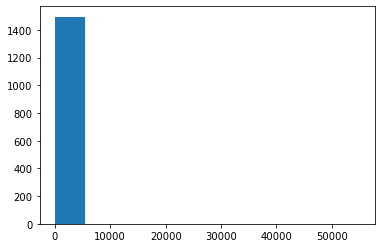

In [209]:
# checking sample distribution
plt.hist(dataset.F11)

# 

#  Outlier detection and replace using 4 standard deviation

In [210]:
# Finding upper limit using SD
upper_limit = dataset.F11.mean() + 4*dataset.F11.std()
upper_limit

6320.43991342369

In [211]:
# Finding lower limit using SD
lower_limit =dataset.F11.mean() - 4*dataset.F11.std()
lower_limit

-6066.028820090356

In [212]:
# checking outliers
dataset[(dataset.F11>upper_limit) | (dataset.F11<lower_limit)]

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
749,UK,910.59,-96.07,-1693.38,15694.65,5.46,65.38,-6.84,15,Very high,8664.18,6.48,-0.78,37.71,-49.96,5,0.00
928,UK,-277.02,-93.57,-2282.28,59744.88,3.30,29.50,-3.26,12,Very low,54949.06,20.60,-3.44,31.95,314.96,6,2277.70
1264,Rest,128.79,-64.70,-2736.24,30886.77,5.01,118.10,-4.71,0,Very high,11550.96,17.72,-5.51,31.29,86.12,6,1302.46
1436,Rest,1156.74,-70.37,-2193.78,16827.90,5.91,6.60,-8.14,9,Very low,14658.52,7.60,1.61,20.01,338.82,7,412.32


In [213]:
#Training dataset
dataset[dataset.F11 > upper_limit] = dataset.F11.median()

In [214]:
#Test dataset
test_dataset[test_dataset.F11 > upper_limit] = test_dataset.F11.median()

In [215]:
# dataset= dataset.drop(dataset[dataset.F11 > upper_limit].index)
dataset.describe()

,F2,F3,F4,F5,F6,F7,F8,F9,F11,F12,F13,F14,F15,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-632.058353,-91.840107,-2305.291933,24033.547607,4.033927,60.307080,-6.942187,11.809387,67.329120,8.079640,-3.624047,29.554747,176.491693,3.936720,919.426267
std,902.536358,30.236101,897.161620,13351.021241,2.894977,58.650147,3.057371,5.443990,334.974798,5.806865,3.049723,12.625604,84.550274,1.835946,1092.418287
min,-3708.930000,-210.780000,-5503.920000,-35169.510000,0.040000,-144.460000,-16.390000,0.000000,0.000000,0.080000,-13.700000,-53.220000,-204.060000,0.000000,0.000000
25%,-1233.330000,-112.110000,-2926.252500,17936.992500,1.945000,21.335000,-9.080000,9.000000,0.260000,3.760000,-5.590000,23.850000,134.220000,3.000000,0.000000
50%,-641.535000,-91.940000,-2302.155000,24083.325000,3.405000,61.960000,-6.955000,12.000000,2.020000,6.730000,-3.530000,29.670000,177.020000,4.000000,428.220000
75%,-0.260000,-71.077500,-1699.387500,30791.145000,5.490000,99.595000,-4.830000,15.000000,13.195000,10.940000,-1.640000,35.550000,216.675000,5.000000,1525.855000
max,2521.860000,13.160000,671.100000,85176.180000,23.390000,239.820000,2.060000,30.000000,5783.840000,45.140000,6.070000,78.390000,738.880000,11.000000,3960.010000


In [216]:
#Training dataset
one_hot = pd.get_dummies(dataset['F1'])

In [217]:
#Test dataset
one_hot_test = pd.get_dummies(test_dataset['F1'])

In [218]:
# Join the encoded df
dataset = dataset.join(one_hot)
dataset 

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,Target,2.02,Europe,Rest,UK,USA
0,UK,258.63,-162.72,-2229.84,31489.95,2.52,192.26,-11.99,12.0,Very low,...,-4.77,52.05,171.46,6.0,0.00,0,0,0,1,0
1,Europe,1033.35,-105.16,-2786.58,24534.99,7.18,46.52,-10.66,15.0,Very high,...,-6.82,26.49,119.34,4.0,1073.28,0,1,0,0,0
2,UK,-1207.47,-112.02,-3162.63,23017.47,3.85,71.06,-4.24,24.0,Medium,...,-0.91,26.97,15.96,7.0,1203.67,0,0,0,1,0
3,USA,-1090.17,-99.53,-3784.14,25597.56,1.18,-8.54,-4.70,18.0,High,...,-8.12,35.34,176.32,1.0,789.66,0,0,0,0,1
4,Europe,-2191.02,-69.12,-2956.14,24770.94,6.22,55.22,-7.82,9.0,Low,...,-5.92,31.47,117.94,4.0,2093.67,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,UK,-1248.72,-93.65,-2419.56,28588.14,2.08,130.12,-9.01,3.0,Low,...,-12.87,35.25,175.56,1.0,0.00,0,0,0,1,0
1496,UK,-276.99,-57.89,-1997.25,7154.19,6.49,-66.84,-5.33,9.0,Very low,...,0.82,53.55,142.92,3.0,2853.23,0,0,0,1,0
1497,UK,-747.84,-106.24,-2464.02,8831.85,8.65,5.54,-3.01,15.0,Low,...,-9.41,30.60,114.14,5.0,1629.55,0,0,0,1,0
1498,Europe,-893.10,-91.75,-2025.12,26506.41,6.31,24.38,-7.37,12.0,Very low,...,2.33,42.78,160.06,3.0,261.47,0,1,0,0,0


In [219]:
# Join the encoded df test dataset
test_dataset = test_dataset.join(one_hot_test)
test_dataset 

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,Target,1.8,Europe,Rest,UK,USA
0,Rest,-1241.58,-132.64,-1706.31,35524.89,5.17,96.82,-3.08,12.0,Low,...,-0.83,15.60,193.70,3.0,NaN,0,0,1,0,0
1,Europe,-132.09,-113.12,-850.02,39549.27,4.27,30.16,-6.88,15.0,Very high,...,-10.07,22.41,238.70,3.0,NaN,0,1,0,0,0
2,USA,95.10,-101.95,-1719.48,-2724.33,4.69,125.88,-3.10,12.0,High,...,-7.42,23.25,149.26,2.0,NaN,0,0,0,0,1
3,USA,2067.24,-118.41,-3986.37,32421.45,5.21,79.06,-11.68,12.0,High,...,1.38,27.42,310.32,3.0,NaN,0,0,0,0,1
4,Rest,-2080.44,-47.43,-1509.36,24896.07,6.37,69.80,-10.97,9.0,High,...,-6.15,23.22,241.56,2.0,NaN,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,USA,-937.56,-114.26,-2626.62,10978.71,3.52,92.24,-7.87,18.0,Medium,...,2.44,32.37,190.64,6.0,NaN,0,0,0,0,1
1496,Rest,-476.82,-69.66,-2757.24,1481.61,1.51,-94.08,-2.89,12.0,Medium,...,0.91,30.12,220.88,6.0,NaN,0,0,1,0,0
1497,USA,-790.95,-59.32,-1853.31,3666.00,3.35,41.54,-12.10,15.0,Medium,...,-3.36,39.39,167.80,4.0,NaN,0,0,0,0,1
1498,UK,-1316.28,-86.89,-3527.10,15709.71,16.53,-10.22,-7.79,15.0,High,...,5.31,9.06,63.18,3.0,NaN,0,0,0,1,0


In [220]:
#droping unwanted columns
dataset = dataset.drop({'F1','USA',2.02},axis = 1)

In [221]:
dataset

,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,Europe,Rest,UK
0,258.63,-162.72,-2229.84,31489.95,2.52,192.26,-11.99,12.0,Very low,280.78,11.44,-4.77,52.05,171.46,6.0,0.00,0,0,1
1,1033.35,-105.16,-2786.58,24534.99,7.18,46.52,-10.66,15.0,Very high,0.02,7.78,-6.82,26.49,119.34,4.0,1073.28,1,0,0
2,-1207.47,-112.02,-3162.63,23017.47,3.85,71.06,-4.24,24.0,Medium,16.32,8.14,-0.91,26.97,15.96,7.0,1203.67,0,0,1
3,-1090.17,-99.53,-3784.14,25597.56,1.18,-8.54,-4.70,18.0,High,1.08,2.28,-8.12,35.34,176.32,1.0,789.66,0,0,0
4,-2191.02,-69.12,-2956.14,24770.94,6.22,55.22,-7.82,9.0,Low,134.62,13.82,-5.92,31.47,117.94,4.0,2093.67,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1248.72,-93.65,-2419.56,28588.14,2.08,130.12,-9.01,3.0,Low,18.42,9.20,-12.87,35.25,175.56,1.0,0.00,0,0,1
1496,-276.99,-57.89,-1997.25,7154.19,6.49,-66.84,-5.33,9.0,Very low,1.54,20.24,0.82,53.55,142.92,3.0,2853.23,0,0,1
1497,-747.84,-106.24,-2464.02,8831.85,8.65,5.54,-3.01,15.0,Low,25.62,1.06,-9.41,30.60,114.14,5.0,1629.55,0,0,1
1498,-893.10,-91.75,-2025.12,26506.41,6.31,24.38,-7.37,12.0,Very low,0.10,1.58,2.33,42.78,160.06,3.0,261.47,1,0,0


In [33]:
test_dataset = test_dataset.drop({'F1','USA','Target',1.8},axis = 1)

In [34]:
cleanup_Assortment = {"F10": {"Very low": 0, "Low": 1, "Medium": 2,"High":3,"Very high":4}}
dataset.replace(cleanup_Assortment, inplace = True)

In [35]:
dataset

,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,Europe,Rest,UK
0,258.63,-162.72,-2229.84,31489.95,2.52,192.26,-11.99,12.0,0.0,280.78,11.44,-4.77,52.05,171.46,6.0,0.00,0,0,1
1,1033.35,-105.16,-2786.58,24534.99,7.18,46.52,-10.66,15.0,4.0,0.02,7.78,-6.82,26.49,119.34,4.0,1073.28,1,0,0
2,-1207.47,-112.02,-3162.63,23017.47,3.85,71.06,-4.24,24.0,2.0,16.32,8.14,-0.91,26.97,15.96,7.0,1203.67,0,0,1
3,-1090.17,-99.53,-3784.14,25597.56,1.18,-8.54,-4.70,18.0,3.0,1.08,2.28,-8.12,35.34,176.32,1.0,789.66,0,0,0
4,-2191.02,-69.12,-2956.14,24770.94,6.22,55.22,-7.82,9.0,1.0,134.62,13.82,-5.92,31.47,117.94,4.0,2093.67,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1248.72,-93.65,-2419.56,28588.14,2.08,130.12,-9.01,3.0,1.0,18.42,9.20,-12.87,35.25,175.56,1.0,0.00,0,0,1
1496,-276.99,-57.89,-1997.25,7154.19,6.49,-66.84,-5.33,9.0,0.0,1.54,20.24,0.82,53.55,142.92,3.0,2853.23,0,0,1
1497,-747.84,-106.24,-2464.02,8831.85,8.65,5.54,-3.01,15.0,1.0,25.62,1.06,-9.41,30.60,114.14,5.0,1629.55,0,0,1
1498,-893.10,-91.75,-2025.12,26506.41,6.31,24.38,-7.37,12.0,0.0,0.10,1.58,2.33,42.78,160.06,3.0,261.47,1,0,0


In [36]:
#Test Data
cleanup_Assortment = {"F10": {"Very low": 0, "Low": 1, "Medium": 2,"High":3,"Very high":4}}
test_dataset.replace(cleanup_Assortment, inplace = True)

In [37]:
test_dataset

,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Europe,Rest,UK
0,-1241.58,-132.64,-1706.31,35524.89,5.17,96.82,-3.08,12.0,1.0,0.32,10.92,-0.83,15.60,193.70,3.0,0,1,0
1,-132.09,-113.12,-850.02,39549.27,4.27,30.16,-6.88,15.0,4.0,1.54,6.72,-10.07,22.41,238.70,3.0,1,0,0
2,95.10,-101.95,-1719.48,-2724.33,4.69,125.88,-3.10,12.0,3.0,0.00,16.56,-7.42,23.25,149.26,2.0,0,0,0
3,2067.24,-118.41,-3986.37,32421.45,5.21,79.06,-11.68,12.0,3.0,8.32,17.92,1.38,27.42,310.32,3.0,0,0,0
4,-2080.44,-47.43,-1509.36,24896.07,6.37,69.80,-10.97,9.0,3.0,0.38,15.92,-6.15,23.22,241.56,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-937.56,-114.26,-2626.62,10978.71,3.52,92.24,-7.87,18.0,2.0,0.60,10.34,2.44,32.37,190.64,6.0,0,0,0
1496,-476.82,-69.66,-2757.24,1481.61,1.51,-94.08,-2.89,12.0,2.0,12.90,17.42,0.91,30.12,220.88,6.0,0,1,0
1497,-790.95,-59.32,-1853.31,3666.00,3.35,41.54,-12.10,15.0,2.0,36.96,6.26,-3.36,39.39,167.80,4.0,0,0,0
1498,-1316.28,-86.89,-3527.10,15709.71,16.53,-10.22,-7.79,15.0,3.0,14.16,14.96,5.31,9.06,63.18,3.0,0,0,1


In [38]:
# traget data and features seprating 
from sklearn.model_selection import train_test_split

X = dataset.loc[:, dataset.columns != 'Target']
y = dataset.loc[:, dataset.columns == 'Target']


In [39]:
# Normalisation of features
inputScaler = MinMaxScaler()
inputScaler.fit(X)
X = inputScaler.transform(X)
X_norm= pd.DataFrame(X)



In [ ]:
# outputScaler = MinMaxScaler()
# outputScaler.fit(y)
# y = outputScaler.transform(y)
# y_norm= pd.DataFrame(y)

In [256]:
y_train

,Target
247,182.33
678,895.12
722,220.26
590,1174.10
186,2350.35
...,...
763,362.25
835,0.00
1216,0.00
559,0.00


In [90]:
# splitting data training and testing 
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.25,random_state=0)


In [91]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [92]:
X_train.shape

(1125, 18)

In [132]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(50,activation='relu',input_dim = 18))

# Adding the second hidden layer
classifier.add(Dense(25, activation='relu'))

# Adding the third hidden layer
classifier.add(Dense( 50, activation='relu'))
# Adding the output layer
classifier.add(Dense( 1))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,epochs=600)

Epoch 1/600
36/36 [==============================] - 0s 586us/step - loss: 1366.7266
Epoch 2/600
36/36 [==============================] - 0s 496us/step - loss: 1393.7829
Epoch 3/600
36/36 [==============================] - 0s 439us/step - loss: 1381.2839
Epoch 4/600
36/36 [==============================] - 0s 409us/step - loss: 1394.4711
Epoch 5/600
36/36 [==============================] - 0s 434us/step - loss: 1364.7891
Epoch 6/600
36/36 [==============================] - 0s 452us/step - loss: 1310.4661
Epoch 7/600
36/36 [==============================] - 0s 398us/step - loss: 1288.4912
Epoch 8/600
36/36 [==============================] - 0s 435us/step - loss: 1222.3459
Epoch 9/600
36/36 [==============================] - 0s 435us/step - loss: 1174.4454
Epoch 10/600
36/36 [==============================] - 0s 437us/step - loss: 1140.4857
Epoch 11/600
36/36 [==============================] - 0s 411us/step - loss: 1064.4112
Epoch 12/600
36/36 [==============================] - 0s 475us/

36/36 [==============================] - 0s 389us/step - loss: 295.9327
Epoch 192/600
36/36 [==============================] - 0s 399us/step - loss: 293.7963
Epoch 193/600
36/36 [==============================] - 0s 399us/step - loss: 296.5087
Epoch 194/600
36/36 [==============================] - 0s 409us/step - loss: 280.4265
Epoch 195/600
36/36 [==============================] - 0s 403us/step - loss: 307.5810
Epoch 196/600
36/36 [==============================] - 0s 401us/step - loss: 286.5086
Epoch 197/600
36/36 [==============================] - 0s 395us/step - loss: 292.8077
Epoch 198/600
36/36 [==============================] - 0s 392us/step - loss: 309.1503
Epoch 199/600
36/36 [==============================] - 0s 401us/step - loss: 282.2934
Epoch 200/600
36/36 [==============================] - 0s 399us/step - loss: 277.0426
Epoch 201/600
36/36 [==============================] - 0s 402us/step - loss: 280.1377
Epoch 202/600
36/36 [==============================] - 0s 395us/step

36/36 [==============================] - 0s 393us/step - loss: 195.1267
Epoch 382/600
36/36 [==============================] - 0s 406us/step - loss: 212.7806
Epoch 383/600
36/36 [==============================] - 0s 401us/step - loss: 200.7858
Epoch 384/600
36/36 [==============================] - 0s 392us/step - loss: 189.3642
Epoch 385/600
36/36 [==============================] - 0s 400us/step - loss: 189.8417
Epoch 386/600
36/36 [==============================] - 0s 409us/step - loss: 196.7022
Epoch 387/600
36/36 [==============================] - 0s 400us/step - loss: 205.6909
Epoch 388/600
36/36 [==============================] - 0s 412us/step - loss: 201.2645
Epoch 389/600
36/36 [==============================] - 0s 397us/step - loss: 196.9459
Epoch 390/600
36/36 [==============================] - 0s 394us/step - loss: 197.7637
Epoch 391/600
36/36 [==============================] - 0s 397us/step - loss: 204.1464
Epoch 392/600
36/36 [==============================] - 0s 398us/step

36/36 [==============================] - 0s 404us/step - loss: 131.7528
Epoch 572/600
36/36 [==============================] - 0s 410us/step - loss: 175.3814
Epoch 573/600
36/36 [==============================] - 0s 402us/step - loss: 172.9740
Epoch 574/600
36/36 [==============================] - 0s 398us/step - loss: 130.0798
Epoch 575/600
36/36 [==============================] - 0s 399us/step - loss: 135.5480
Epoch 576/600
36/36 [==============================] - 0s 401us/step - loss: 159.1046
Epoch 577/600
36/36 [==============================] - 0s 404us/step - loss: 146.0096
Epoch 578/600
36/36 [==============================] - 0s 401us/step - loss: 141.2377
Epoch 579/600
36/36 [==============================] - 0s 406us/step - loss: 142.2312
Epoch 580/600
36/36 [==============================] - 0s 402us/step - loss: 141.6977
Epoch 581/600
36/36 [==============================] - 0s 413us/step - loss: 142.9090
Epoch 582/600
36/36 [==============================] - 0s 398us/step

In [133]:
### Lets Do the prediction and check performance metrics
train_predict=classifier.predict(X_train)
test_predict=classifier.predict(X_test)

In [135]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_predict,y_train))

157.18340294124133

In [136]:
# R2 score
r2_score(y_test, test_predict)

0.9692118000945458

In [137]:
#matrics MAE MSE RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_predict)))

Mean Absolute Error: 99.91960556940715
Mean Squared Error: 37149.70979083665
Root Mean Squared Error: 192.7425998341743


# 

## Linear Regression

In [134]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Building LinearRegression model 
regressor=  linear_model.LinearRegression()
regressor.fit(X_train, y_train)  



LinearRegression()

In [135]:
# Prediction of test data
y_pred= regressor.predict(X_test)  
y_pred

array([[-1.59105477e+02],
       [-7.29021627e+02],
       [ 2.45165424e+03],
       [ 1.00383188e+03],
       [ 2.83612576e+03],
       [-1.08089685e+02],
       [ 1.01636570e+03],
       [ 1.56530481e+03],
       [ 1.07715238e+03],
       [ 2.19998648e+02],
       [-1.44752526e+02],
       [-3.02189199e+02],
       [ 1.02122744e+03],
       [ 8.75070862e+02],
       [-2.80665882e+02],
       [-4.42051194e+01],
       [ 1.01338442e+03],
       [ 6.69435745e+02],
       [-1.50208542e+03],
       [ 7.47536111e+02],
       [ 2.03029458e+03],
       [ 1.22870386e+03],
       [-1.56811731e+03],
       [-3.09178514e+02],
       [ 3.35851586e+02],
       [ 2.39528950e+03],
       [ 5.47744422e+02],
       [ 2.69675028e+03],
       [ 1.79528723e+03],
       [ 3.87843487e+02],
       [-3.83800216e+02],
       [ 1.02693016e+03],
       [-3.85287990e+01],
       [ 8.29429038e+02],
       [-2.75431386e+02],
       [ 5.55573598e+02],
       [ 1.10644466e+03],
       [ 1.03372849e+03],
       [ 7.1

In [137]:
#matrics MAE MSE RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test.values, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test.values, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test.values, y_pred)))

Mean Absolute Error: 393.1436507209724
Mean Squared Error: 249004.1134786349
Root Mean Squared Error: 499.003119708319


In [138]:
LinearRegression
r2_score(y_test, y_pred)

0.7936353078873415

In [139]:
y_pred

array([[-1.59105477e+02],
       [-7.29021627e+02],
       [ 2.45165424e+03],
       [ 1.00383188e+03],
       [ 2.83612576e+03],
       [-1.08089685e+02],
       [ 1.01636570e+03],
       [ 1.56530481e+03],
       [ 1.07715238e+03],
       [ 2.19998648e+02],
       [-1.44752526e+02],
       [-3.02189199e+02],
       [ 1.02122744e+03],
       [ 8.75070862e+02],
       [-2.80665882e+02],
       [-4.42051194e+01],
       [ 1.01338442e+03],
       [ 6.69435745e+02],
       [-1.50208542e+03],
       [ 7.47536111e+02],
       [ 2.03029458e+03],
       [ 1.22870386e+03],
       [-1.56811731e+03],
       [-3.09178514e+02],
       [ 3.35851586e+02],
       [ 2.39528950e+03],
       [ 5.47744422e+02],
       [ 2.69675028e+03],
       [ 1.79528723e+03],
       [ 3.87843487e+02],
       [-3.83800216e+02],
       [ 1.02693016e+03],
       [-3.85287990e+01],
       [ 8.29429038e+02],
       [-2.75431386e+02],
       [ 5.55573598e+02],
       [ 1.10644466e+03],
       [ 1.03372849e+03],
       [ 7.1

## Ranadom Forest Regressor

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
# X, y = make_regression(n_features=18, n_informative=2,random_state=0, shuffle=False)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [171]:
# building random forest regressor
regr = RandomForestRegressor( random_state=0, n_estimators=100,max_depth=10)

In [172]:
# Trainig data
regr.fit(X_train, y_train)

<ipython-input-172-54b5df3622f8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=0)

In [173]:
# Predicting test data
y_pred=regr.predict(X_test)

In [174]:
y_pred

array([ 308.53434932,  248.88554914,  830.42895752, 1024.43267724,
       1366.57186361,  276.39926415, 1091.1475209 ,  931.79560971,
        498.74650194,  987.12601616,  686.12104349,  297.84551514,
        764.9578115 ,  989.28468916,  726.98306434,  118.62610658,
       1102.25013463,  531.32151343,  207.99767598,  159.2052136 ,
       1984.08563958, 1149.7669794 ,  519.67939208,  875.38368288,
        393.32530179, 1848.32499471,  584.63561675, 2345.86556884,
        604.99421982,  579.16849266,  433.81882004,  668.42598833,
        478.3206354 ,  289.92884237,  677.89997029,  706.0704223 ,
        751.41837125, 1372.1746857 , 1207.49661069,  331.33236365,
       1597.79470905,  517.49768197,  728.48818077, 1357.76868344,
        377.30147196,  787.14940104, 1840.55323608, 1322.13241333,
        174.26235935,  400.97488574,  345.96337215, 2033.793815  ,
       2227.12538791,  375.07070528, 1632.51815436,  960.0034718 ,
       1147.67223477,  831.44359615,  707.87331265, 2389.16058

In [175]:
regr.score(X_train, y_train)

0.8630872880541102

In [176]:
regr.score(X_test, y_test)

0.47514381778691095

In [177]:
# R2 score
r2_score(y_test, y_pred)

0.47514381778691095

In [87]:
#matrics MAE MSE RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 449.1350530666667
Mean Squared Error: 371373.34501992987
Root Mean Squared Error: 609.4040900912381


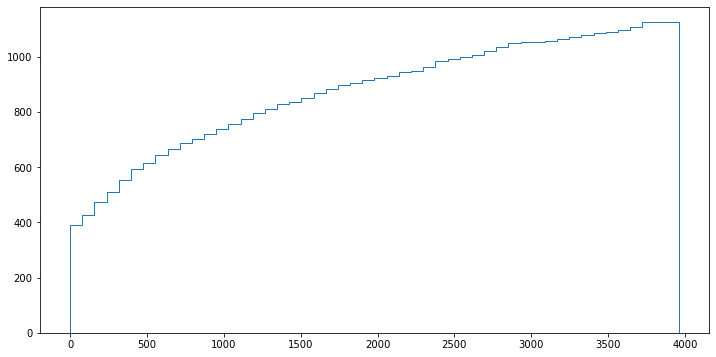

In [155]:
fig, ax = plt.subplots(figsize=(12, 6))
n_bins = 50

# plot the cumulative histogram
n, bins, patches = ax.hist(y_train, n_bins,histtype='step', cumulative=True, label='Empirical')

## Test Data Prediction

In [179]:
#normalise test data 

inputScaler = MinMaxScaler()
inputScaler.fit(test_dataset)
X1 = inputScaler.transform(test_dataset)
X_norm_test= pd.DataFrame(X1)

X_norm_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.452464,0.507434,0.527913,0.432180,0.220338,0.523682,0.482396,0.40208,0.496267,0.011797,0.219364,0.470043,0.526511,0.523575,0.361733,0.245333,0.256000,0.243333
std,0.139349,0.160159,0.150466,0.091609,0.157795,0.145484,0.166048,0.18086,0.356895,0.062044,0.159969,0.149046,0.094228,0.112177,0.166318,0.430428,0.436567,0.429238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360704,0.404045,0.432060,0.387019,0.103007,0.427981,0.370270,0.30000,0.250000,0.000044,0.100742,0.369784,0.483392,0.464769,0.272727,0.000000,0.000000,0.000000
50%,0.453590,0.500367,0.530030,0.434421,0.184577,0.528083,0.482162,0.40000,0.500000,0.000332,0.183505,0.473381,0.526076,0.522423,0.363636,0.000000,0.000000,0.000000
75%,0.547732,0.614303,0.627595,0.478190,0.302895,0.621612,0.591892,0.50000,0.750000,0.002562,0.299087,0.573501,0.570623,0.577627,0.454545,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
#Predict data using neural network
target = pd.DataFrame(classifier.predict(X_norm_test.values))

In [181]:
target.describe()

,0
count,1500.000000
mean,1292.591797
std,1258.111938
min,-136.955139
25%,217.038666
50%,940.197784
75%,2150.848511
max,6381.482910


In [182]:
test_dataset_final=pd.read_csv("CE802_P3_Data/CE802_P3_Test.csv")

In [183]:
result = pd.concat([test_dataset_final, target], axis=1)

In [184]:
test_dataset_final['Target']=target
test_dataset_final

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,Rest,-1241.58,-132.64,-1706.31,35524.89,5.17,96.82,-3.08,12,Low,0.32,10.92,-0.83,15.60,193.70,3,431.017151
1,Europe,-132.09,-113.12,-850.02,39549.27,4.27,30.16,-6.88,15,Very high,1.54,6.72,-10.07,22.41,238.70,3,489.113770
2,USA,95.10,-101.95,-1719.48,-2724.33,4.69,125.88,-3.10,12,High,0.00,16.56,-7.42,23.25,149.26,2,1570.617676
3,USA,2067.24,-118.41,-3986.37,32421.45,5.21,79.06,-11.68,12,High,8.32,17.92,1.38,27.42,310.32,3,3404.567627
4,Rest,-2080.44,-47.43,-1509.36,24896.07,6.37,69.80,-10.97,9,High,0.38,15.92,-6.15,23.22,241.56,2,1424.297974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,USA,-937.56,-114.26,-2626.62,10978.71,3.52,92.24,-7.87,18,Medium,0.60,10.34,2.44,32.37,190.64,6,2095.872070
1496,Rest,-476.82,-69.66,-2757.24,1481.61,1.51,-94.08,-2.89,12,Medium,12.90,17.42,0.91,30.12,220.88,6,2195.164551
1497,USA,-790.95,-59.32,-1853.31,3666.00,3.35,41.54,-12.10,15,Medium,36.96,6.26,-3.36,39.39,167.80,4,1026.236084
1498,UK,-1316.28,-86.89,-3527.10,15709.71,16.53,-10.22,-7.79,15,High,14.16,14.96,5.31,9.06,63.18,3,6381.482910


In [185]:
# write data into csv
test_dataset_final.to_csv('CE802_P3_Test.csv', encoding='utf-8', index=False)